# Few-Shots Prompting

Few-shot prompting can be used as a technique to enable in-context learning where we provide demonstrations in the prompt to steer the model to better performance. The demonstrations serve as conditioning for subsequent examples where we would like the model to generate a response.

## References:
* [Touvron et al. 2023](https://arxiv.org/pdf/2302.13971.pdf): present few shot properties  when models were scaled to a sufficient size
* [Kaplan et al., 2020](https://arxiv.org/abs/2001.08361)
* [Brown et al. 2020](https://arxiv.org/abs/2005.14165)


## Running this code on MyBind.org

Note: remember that you will need to **adjust CONFIG** with **proper URL and API_KEY**!

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/GenILab-FAU/prompt-eng/HEAD?urlpath=%2Fdoc%2Ftree%2Fprompt-eng%2Ffew_shots.ipynb)



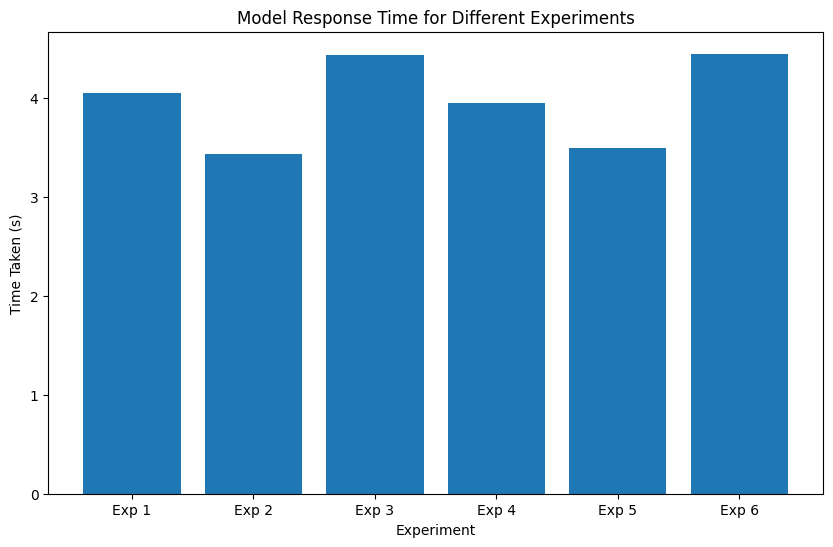


--- Params: {'temperature': 0.7, 'num_ctx': 150, 'num_predict': 150}
Response: **Order History Feature Technical Solution**

To implement the Order History feature, we will design a solution that retrieves and displays customer orders in a user-friendly manner.

**Database Schema:**

The following database schema will be used to store order information:

```sql
CREATE TABLE customers (
  id INT PRIMARY KEY,
  name VARCHAR(255),
  email VARCHAR(255)
);

CREATE TABLE orders (
  id INT PRIMARY KEY,
  customer_id INT,
  order_date DATE,
  total DECIMAL(10,2),
  status VARCHAR(50),
  FOREIGN KEY (customer_id) REFERENCES customers(id)
);
```

**API Endpoints:**

The following API endpoints will be used to retrieve and manage order information:

### GET /orders

Retrieve a
Time Taken: 4.0479819774627686 s

--- Params: {'temperature': 0.5, 'num_ctx': 200, 'num_predict': 100}
Response: **Order History Feature Solution**

To implement an order history feature, we will utilize a combination of d

In [1]:
# Few-Shot Prompting for Requirement Analysis in E-commerce with Experiments, Visualizations, and Robust Pipeline

import requests
import matplotlib.pyplot as plt
import time as tm

def create_payload(target, model, prompt, temperature, num_ctx, num_predict):
    return {
        "model": model,
        "prompt": prompt,
        "stream": False,
        "options": {
            "temperature": temperature,
            "num_ctx": num_ctx,
            "num_predict": num_predict
        }
    }

def model_req(payload):
    url = "http://127.0.0.1:11434/api/generate"
    try:
        start = tm.time()
        response = requests.post(url, json=payload)
        end = tm.time()
        response.raise_for_status()
        json_resp = response.json()
        if isinstance(json_resp, dict) and "response" in json_resp:
            return end - start, json_resp["response"]
        return None, "Error: Unexpected response format"
    except requests.exceptions.RequestException as e:
        return None, f"Request Error: {str(e)}"
    except Exception as e:
        return None, f"Error: {str(e)}"

messages = [
    "We need a feature for customers to view their order history.",
    "Design a feature that provides customers with detailed order history, including invoices."
]

few_shots = [
    "You are a software analyst. Provide technical solutions based on input requirements.",
    "You are an expert e-commerce consultant. Provide secure and scalable solutions for requirements."
]

params = [
    {"temperature": 0.7, "num_ctx": 150, "num_predict": 150},
    {"temperature": 0.5, "num_ctx": 200, "num_predict": 100},
    {"temperature": 0.9, "num_ctx": 100, "num_predict": 200}
]

results = []

def run_experiment(message, few_shot, params):
    prompt = few_shot + '\n' + message
    for p in params:
        payload = create_payload("ollama", "llama3.2:latest", prompt, p["temperature"], p["num_ctx"], p["num_predict"])
        time, response = model_req(payload)
        if time is not None:
            results.append({"params": p, "response": response, "time": time})
        else:
            results.append({"params": p, "response": response, "time": 0})

for msg, fs in zip(messages, few_shots):
    run_experiment(msg, fs, params)

plt.figure(figsize=(10, 6))
times = [r['time'] for r in results]
labels = [f"Exp {i+1}" for i in range(len(times))]

plt.bar(labels, times)
plt.xlabel('Experiment')
plt.ylabel('Time Taken (s)')
plt.title('Model Response Time for Different Experiments')
plt.show()

for r in results:
    print("\n--- Params:", r['params'])
    print("Response:", r['response'])
    print("Time Taken:", r['time'], "s")


## How to improve it?

Following the findings from [Min et al. (2022)](https://arxiv.org/abs/2202.12837), here are a few more tips about demonstrations/exemplars when doing few-shot:

* "the label space and the distribution of the input text specified by the demonstrations are both important (regardless of whether the labels are correct for individual inputs)"
* the format you use also plays a key role in performance, even if you just use random labels, this is much better than no labels at all.
* additional results show that selecting random labels from a true distribution of labels (instead of a uniform distribution) also helps.